In [1]:
#push!(LOAD_PATH, pwd());
using TSSM

 *** OPENMP n_threads =           8


In [2]:
Nx=2048

2048

In [ ]:
## Cubic Nonlinear Schrödinger equation

$$\mathrm{i}\frac{\partial \psi}{\partial t}=-\frac{1}{2}\frac{\partial^2\psi}{\partial x^2}+\kappa  |\psi|^2\psi,
$$ $\kappa=-1$ and initial condition
$$\psi(x,0)=\sum_{j=1}^2\frac{a_j}{\cosh(a_j(x-c_j))}\exp^{-ib_j x}$$
the parameters as below.

In [3]:
V(x)=1/2*x^2;
m = SchroedingerReal1D(Nx, -50, 50, potential=V, mass=1.0,cubic_coupling=390)

TSSM.SchroedingerReal1D{Float64}(Ptr{Void} @0x00000000020dd4d0)

In [4]:
psi=wave_function(m)

TSSM.WfSchroedingerReal1D{Float64}(Ptr{Void} @0x0000000001c65430,TSSM.SchroedingerReal1D{Float64}(Ptr{Void} @0x00000000020dd4d0))

In [5]:
f(x)=exp(-x^2)
set!(psi, f)

In [6]:
include("groundstate.jl")

groundstate! (generic function with 1 method)

In [7]:
groundstate!(psi, extrapolation_order=2)
save(psi,"groundstate.hf5")

In [8]:
using PyPlot

In [10]:
x=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)
plot(x, real(u[1:end-2]).^2)

In [10]:
xmin=-400
xmax=400
const v0=1.4
const k=11.4
V(x)=v0*cos(k*x)
m = Schroedinger1D(8*Nx, xmin, xmax, potential=V, cubic_coupling=390)
psi=wave_function(m)

TSSM.WfSchroedinger1D{Float64}(Ptr{Void} @0x00000000039fd9c0,TSSM.Schroedinger1D{Float64}(Ptr{Void} @0x000000000399ce30))

In [11]:
load!(psi,"groundstate.hf5")

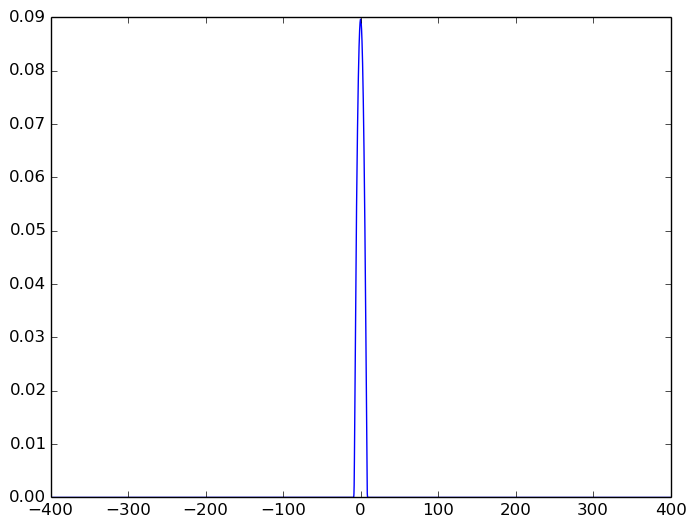

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faed34202d0>

In [12]:
x=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)
plot(x, real(u[1:end]).^2)

In [13]:
include("time_stepper.jl")
include("schemes.jl");

In [14]:
x = get_nodes(m);
to_real_space!(psi);
u = get_data(psi, true);

tend=20.0
t0=0.0
out=0
tol=1e-8

maxsteps=10^6
plotdata=abs(u)
steps=zeros(maxsteps)
mytime=zeros(maxsteps)
told=t0
nsteps=0
load!(psi,"groundstate.hf5")
    @time  for t in adaptive_time_stepper(psi, t0, tend, 0.001, tol, palindromic_scheme_56, "AB")
    if nsteps%100==0
     @printf("t=%20.18E \n",t)
    end
    if out==1
      to_real_space!(psi)
      plotdata = [plotdata abs(u)]
      end
    nsteps=nsteps+1
    mytime[nsteps+1]=t
    steps[nsteps]=t-told
      told=t
      
  end



t=1.000000000000000021E-03 
t=4.981490413346695845E-01 
t=1.082130576692063695E+00 
t=1.575109913478336177E+00 
t=1.995531727379341813E+00 
t=2.403016260829474948E+00 
t=2.806415780680117322E+00 
t=3.209145541530961765E+00 
t=3.613039451414653325E+00 
t=4.019150041762715730E+00 
t=4.428911045481999764E+00 
t=4.844106882083076826E+00 
t=5.266937065065024015E+00 
t=5.698936219013998716E+00 
t=6.140601599481658290E+00 
t=6.588634919010011082E+00 
t=7.042298846506859000E+00 
t=7.498436312194180609E+00 
t=7.956146149528496636E+00 
t=8.416870671863039277E+00 
t=8.877870264111555443E+00 
t=9.344369609843665714E+00 
t=9.811837942052985539E+00 
t=1.028681237308664898E+01 
t=1.076429399195589021E+01 
t=1.124939730250786951E+01 
t=1.173598170125626439E+01 
t=1.222646777804216534E+01 
t=1.271605363480732898E+01 
t=1.320839260598329012E+01 
t=1.370702363723544437E+01 
t=1.420355188870920493E+01 
t=1.469548090996278411E+01 
t=1.518779723861385378E+01 
t=1.568407891438838675E+01 
t=1.6172875491684955

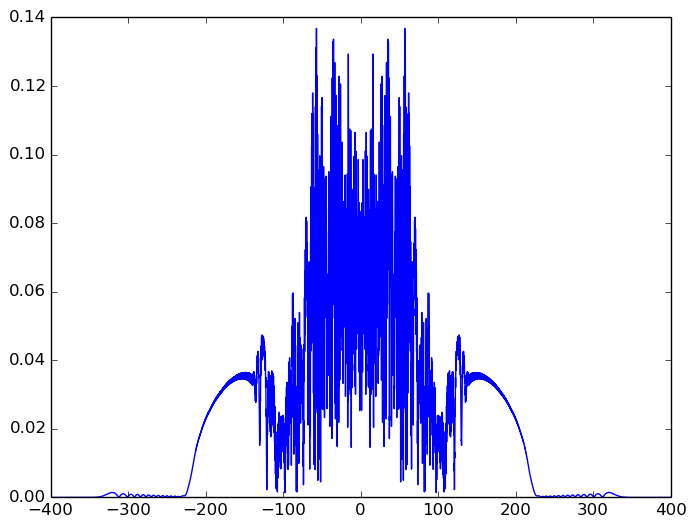

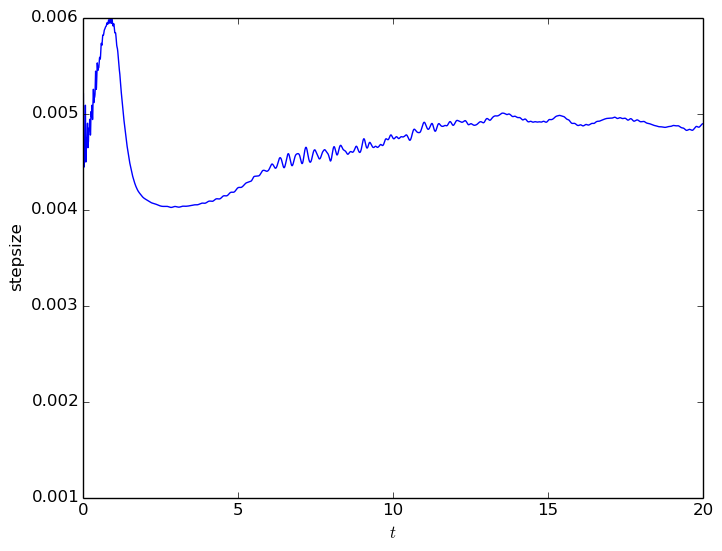

In [15]:
x=get_nodes(m);
u=get_data(psi,true)
to_real_space!(psi)
plot(x, abs(u))
figure(2)
plot(mytime[1:nsteps-1], steps[1:nsteps-1])#last short step not plotted
  xlabel("\$t\$")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")

In [16]:
psia=wave_function(m)
psi_ref=wave_function(m)
psi=wave_function(m)

TSSM.WfSchroedinger1D{Float64}(Ptr{Void} @0x00000000040be510,TSSM.Schroedinger1D{Float64}(Ptr{Void} @0x000000000399ce30))

In [17]:
include("my_helper.jl")
tend=20.0;
t0=0.0;
tols=[-5,-8,-10];
out=0;
stepmin_ex=0;
latex=1;

In [16]:
load!(psi_ref,"groundstate.hf5")
@time for t in adaptive_time_stepper(psi_ref, t0, tend, 0.01, 1e-12, palindromic_scheme_56, "AB")
end
save(psi_ref,"psi_ref_groundstate.hf5")

LoadError: LoadError: InterruptException:
while loading In[16], in expression starting on line 2

In [18]:
load!(psi_ref,"psi_ref_groundstate.hf5")
#distance(psia,psi_ref)

In [19]:
@printf("Method & \\# steps adaptive & \\# steps equidist & time adaptive & time equidist \\\\ \\hline \n")
maxsteps=10^6
nrep=1
for tol in tols
    for scheme in schemes
        steps_a=zeros(maxsteps)
        mytime=zeros(maxsteps)
        time_a=0.0
        nsteps_a=0
        for n in 1:nrep #average time over nrep runs
            told=0.0
            nsteps_a=0
            load!(psia,"groundstate.hf5")
            time_a =time_a+ @elapsed  for t in adaptive_time_stepper2(psia, t0, tend, 0.01, 10.0^tol, scheme, "AB")
                    nsteps_a=nsteps_a+1
                    steps_a[nsteps_a]=t-told
                    mytime[nsteps_a]=t
                    told=t    
            end
        end
        time_a=time_a/nrep
        stepmin=minimum(steps_a[1:nsteps_a-1])
        if out==1
            savefig!(scheme,schemes,mytime,steps_a,nsteps_a)
        end
        if stepmin_ex==1
            stepmin=calc_stepmin(psi_ref,psia,psi,scheme,soliton)
        end 
        steps=zeros(maxsteps)
        mytime=zeros(maxsteps)
        nsteps=0
        time=0.0
        for n in 1:nrep #average time over nrep runs
            told=0.0
            nsteps=0
            load!(psi,"groundstate.hf5")
            time = time + @elapsed  for t in equidistant_time_stepper(psi, t0, tend, stepmin, scheme, "AB")
                nsteps=nsteps+1
                steps[nsteps]=t-told
                mytime[nsteps]=t
                told=t 
            end
        end
        time=time/nrep
        if latex==1
            latextable(scheme,schemes,tol,nsteps_a,nsteps,time_a,time)
        end
    end
end

Method & \# steps adaptive & \# steps equidist & time adaptive & time equidist \\ \hline 
\texttt{Emb 4/3 AK p}, TOL = $ 10^{-5} $ & $ 2233 $ & $ 2936 $ & $ 10.237 $ & $ 7.609 $ \\ 
\texttt{PP 3/4 A}, TOL = $ 10^{-5} $ & $ 3889 $ & $ 4204 $ & $ 14.029 $ & $ 7.299 $ \\ 
\texttt{PP 5/6 A}, TOL = $ 10^{-5} $ & $ 4368 $ & $ 4768 $ & $ 40.530 $ & $ 21.756 $ \\ \hline 
\texttt{Emb 4/3 AK p (defect)}, TOL = $ 10^{-5} $ & $ 1984 $ & $ 2284 $ & $ 11.632 $ & $ 5.970 $ \\ 
\texttt{PP 3/4 A (defect)}, TOL = $ 10^{-5} $ & $ 3897 $ & $ 4207 $ & $ 15.152 $ & $ 7.306 $ \\ 
\texttt{PP 5/6 A (defect)}, TOL = $ 10^{-5} $ & $ 4363 $ & $ 4903 $ & $ 43.352 $ & $ 22.546 $ \\ \hline 
\texttt{Emb 4/3 AK p}, TOL = $ 10^{-8} $ & $ 10598 $ & $ 11502 $ & $ 43.464 $ & $ 26.826 $ \\ 
\texttt{PP 3/4 A}, TOL = $ 10^{-8} $ & $ 21925 $ & $ 23743 $ & $ 67.694 $ & $ 36.652 $ \\ 
\texttt{PP 5/6 A}, TOL = $ 10^{-8} $ & $ 4282 $ & $ 4974 $ & $ 38.602 $ & $ 21.775 $ \\ \hline 
\texttt{Emb 4/3 AK p (defect)}, TOL = $ 10^{-8} $

In [29]:
 nstep=10000
    tol=1e-8
    dt=0.001
    @printf("Method & %d steps without errorestimator & %d steps with errorestimator\\\\ \\hline \n",nstep,nstep)
    for scheme in schemes
    load!(psi,"groundstate.hf5")
    
        time1 = @elapsed  for t in 1:nstep
            step!(psi, dt, scheme,"AB")
        end
        psi2=clone(psi)
        time2 = @elapsed  for t in 1:nstep
        if typeof(scheme)==PalindromicScheme
           copy!(psi, psi2)
           step_palindromic!(psi, psi2, dt, scheme.scheme, "AB")
           err = 0.5*distance(psi, psi2)/tol
        end
        if typeof(scheme)==EmbeddedScheme
           copy!(psi, psi2)
           step_embedded!(psi, psi2, dt, scheme.scheme1, scheme.scheme2, "AB")
           err = distance(psi, psi2)/tol
        end  
        if typeof(scheme)==DefectBasedScheme
            step_defect_based!(psi, psi2, dt, scheme.scheme, "AB")
            err = dt*norm(psi2)/(scheme.order+1)/tol
        end
    end
        if scheme==schemes[1]
            @printf("\\texttt{Emb 4/3 AK p} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[2]
            @printf(    "\\texttt{PP 3/4 A} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[3]
        @printf(    "\\texttt{PP 5/6 A} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \\hline \n",time1,time2)
        end
        if scheme==schemes[4]
            @printf("\\texttt{Emb 4/3 AK p (defect)} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[5]
            @printf(    "\\texttt{PP 3/4 A (defect)} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \n",time1,time2)
        end
        if scheme==schemes[6]
        @printf(    "\\texttt{PP 5/6 A (defect)} & \$ %5.3f \$ & \$ %5.3f \$ \\\\ \\hline \n",time1,time2)
        end
    end

Method & 10000 steps without errorestimator & 10000 steps with errorestimator\\ \hline 
\texttt{Emb 4/3 AK p} & $ 14.095 $ & $ 24.383 $ \\ 
\texttt{PP 3/4 A} & $ 9.938 $ & $ 27.758 $ \\ 
\texttt{PP 5/6 A} & $ 26.123 $ & $ 91.258 $ \\ \hline 
\texttt{Emb 4/3 AK p (defect)} & $ 15.099 $ & $ 34.712 $ \\ 
\texttt{PP 3/4 A (defect)} & $ 9.810 $ & $ 22.504 $ \\ 
\texttt{PP 5/6 A (defect)} & $ 36.032 $ & $ 85.023 $ \\ \hline 


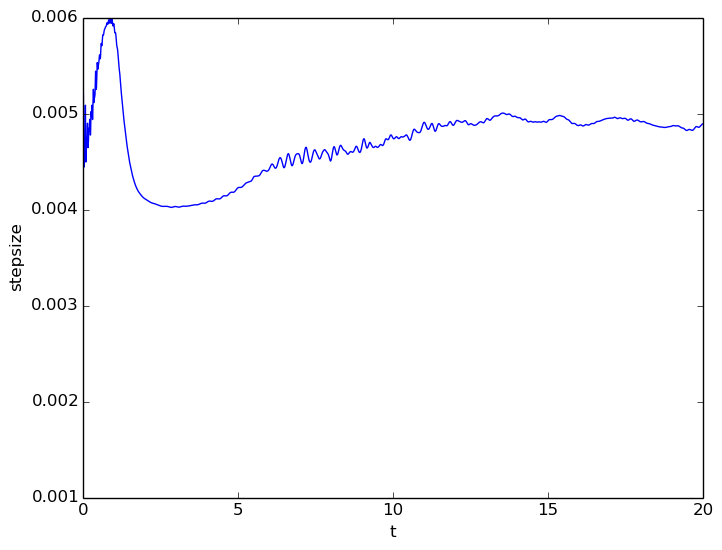

In [19]:
figure(1)
  hold(false)
plot(mytime[1:nsteps-1], steps[1:nsteps-1])
  xlabel("t")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")

.749434 seconds (414.81 k allocations: 174.696 GB, 4.28% gc time)


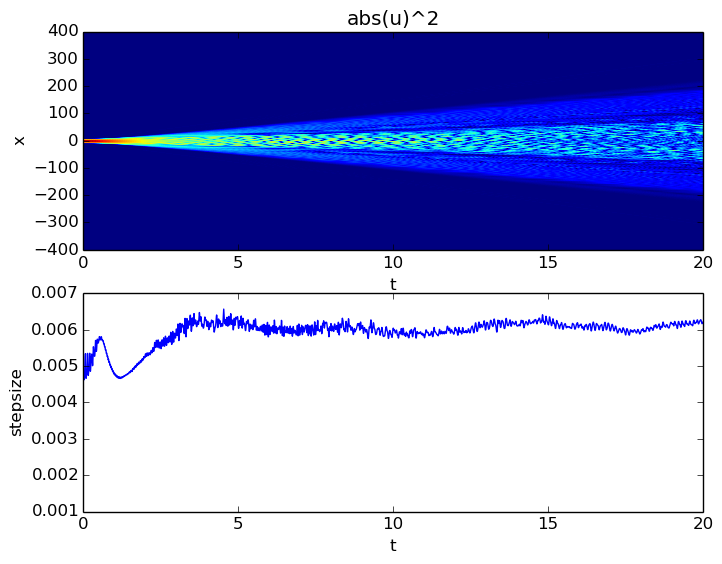

In [17]:
figure(1)
  hold(false)
  if out==1
  subplot(2, 1, 1)
    pcolorfast(mytime[1:nsteps+1],x,plotdata)
  xlabel("t")
  ylabel("x")
  #colorbar()
  axis([t0,tend,xmin,xmax])
  title("abs(u)^2")

  subplot(2, 1, 2)
  end
plot(mytime[1:nsteps-1], steps[1:nsteps-1])
  xlabel("t")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")